# step-1 bussiness understanding

* Business problem or objectives :
 
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
import missingno as mn

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\application_data.csv.zip")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<Figure size 200x1200 with 0 Axes>

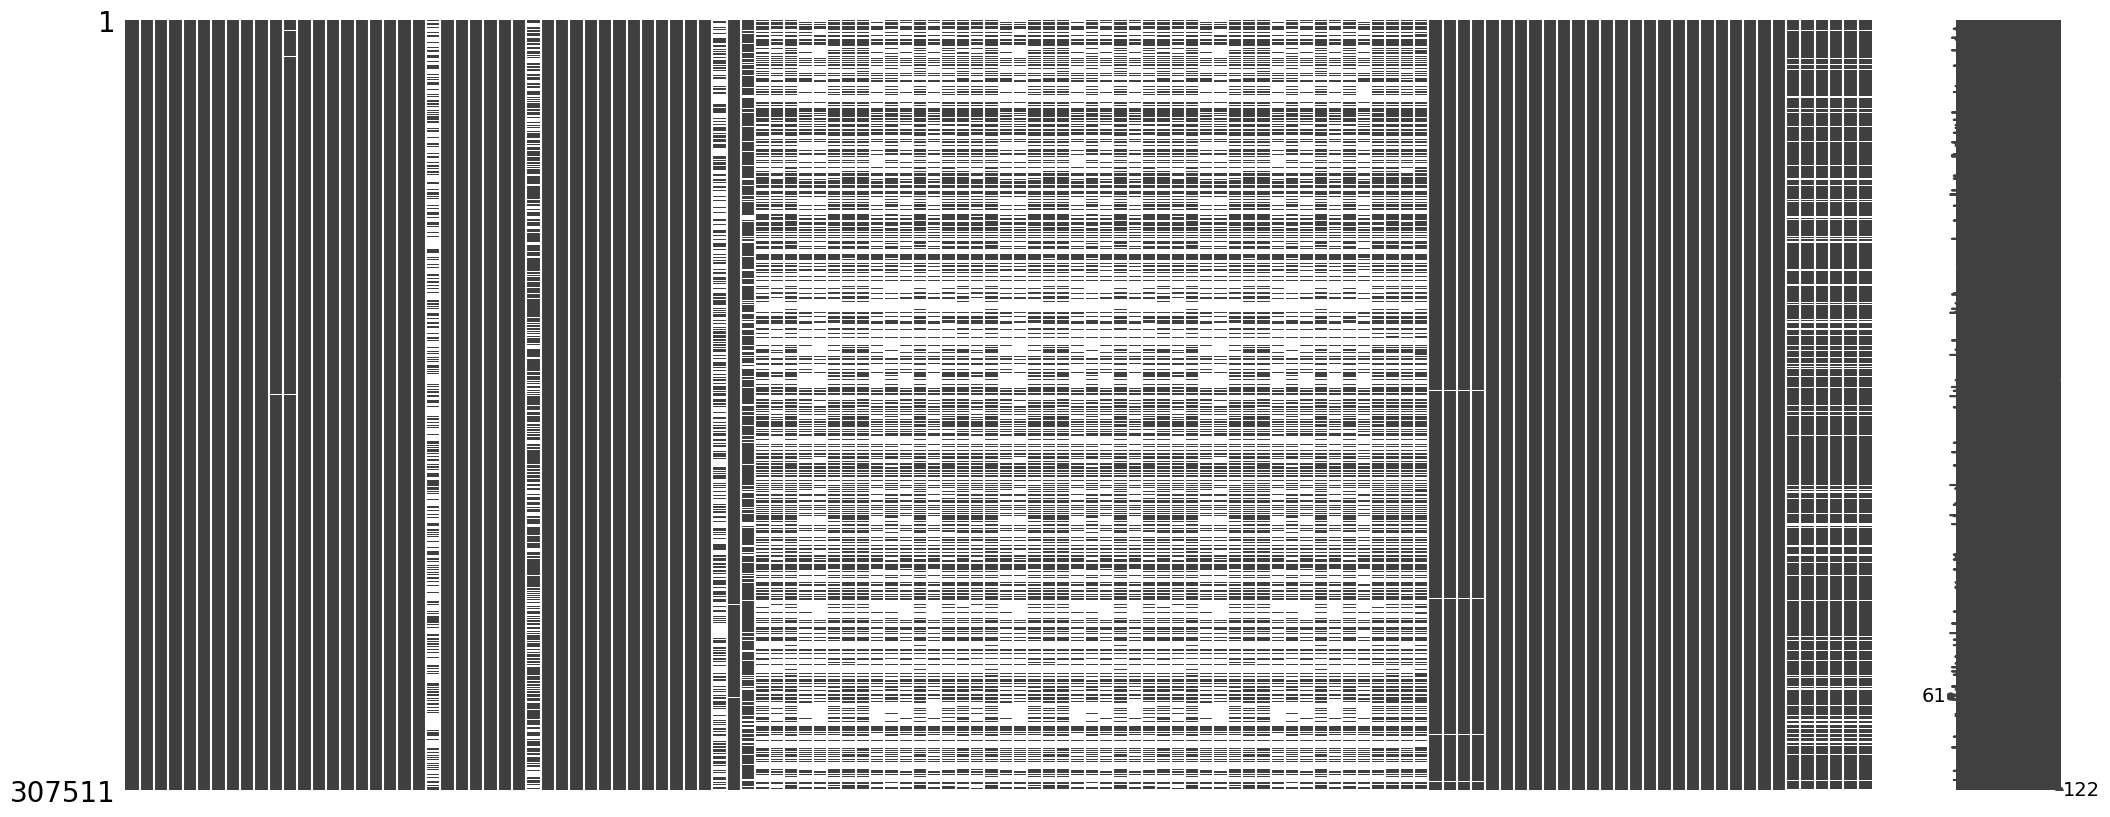

In [4]:
plt.figure(figsize = (2,12))
mn.matrix(df)
plt.show()

- there are multiple columns which have have 30 % missing value like see so we have to delete that particular columns

In [5]:
x = round(df.isnull().sum()* 100 /len(df),2).reset_index()
x.rename(columns = {'index':'columns',0:'missing_vlaue_p'},inplace = True)

In [6]:
y =x[x['missing_vlaue_p']>40]
z= y['columns'].to_list()

In [7]:
df.drop(columns = z,inplace = True)

- i delete that colums which have 40% > missing values

# Step 2 -> Data exploration

In [8]:
df.shape

(307511, 73)

In [9]:
df.size

22448303

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [11]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [12]:
df.FLAG_DOCUMENT_3.value_counts()

FLAG_DOCUMENT_3
1    218340
0     89171
Name: count, dtype: int64

- in all flag documents 3rd no is only where most of the people not sumbit there 3rd documents

In [13]:
df.shape

(307511, 73)

- data is to much large 

In [14]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.unique()#  Yeh value batati hai ki applicant ne credit bureau se apni credit history ya report ke liye kitne din pehle request ki thi

array([ 0., nan,  1.,  2.,  3.,  4.])

- wrond data type here and nan values are also here 

In [15]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

- most of the people not requested 

In [16]:
df.REG_REGION_NOT_LIVE_REGION.unique()#Applicant jis region mein rehta hai, kya wo region abhi active hai (loan services ke liye)

array([0, 1], dtype=int64)

In [17]:
df.REG_REGION_NOT_LIVE_REGION.value_counts()

REG_REGION_NOT_LIVE_REGION
0    302854
1      4657
Name: count, dtype: int64

- there are almostly one unique value which is not importent for the analysis 

In [18]:
df.HOUR_APPR_PROCESS_START.unique() # time of start aproval

array([10, 11,  9, 17, 16, 14,  8, 15,  7, 13,  6, 12, 19,  3, 18, 21,  4,
        5, 20, 22,  1,  2, 23,  0], dtype=int64)

In [19]:
df.CNT_FAM_MEMBERS.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [20]:
df.FLAG_MOBIL.unique() #➔ Yeh flag batata hai ki applicant ke paas mobile phone hai ya nahi.

array([1, 0], dtype=int64)

In [21]:
df.FLAG_MOBIL.value_counts()

FLAG_MOBIL
1    307510
0         1
Name: count, dtype: int64

- there are almost one unique value which is not importent for the anlaysis

In [22]:
df.TARGET.unique()

array([1, 0], dtype=int64)

In [23]:
df.TARGET.value_counts()*100/len(df)

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

- there are almost 9% people which are intrested to defalult the loan 

In [24]:
df.DEF_30_CNT_SOCIAL_CIRCLE.unique() #  Applicant ke kitne dost/rishtedaar 30 din ke andar apna loan nahi chuka paaye.

array([ 2.,  0.,  1., nan,  3.,  4.,  5.,  6.,  7., 34.,  8.])

- threre are one outlire along with nan values a

In [25]:
df.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: count, dtype: int64

- most of the people which are not intrested to give the information about this 

In [26]:
df.OBS_30_CNT_SOCIAL_CIRCLE.unique()# Customer ke 30 din mein kitne logon ke saath social interaction

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

- there are outlire along with unique values 

In [27]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().tail()

OBS_30_CNT_SOCIAL_CIRCLE
30.0     2
28.0     1
29.0     1
47.0     1
348.0    1
Name: count, dtype: int64

### discrete categorical 

In [28]:
df.ORGANIZATION_TYPE.unique() # some wrong data is avaliable 

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

- there wrong data which is xna

In [29]:
df.ORGANIZATION_TYPE.value_counts().head(8)  #Customer kis prakar ki organization mein kaam karta hai

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Name: count, dtype: int64

In [30]:
df.WEEKDAY_APPR_PROCESS_START.unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [31]:
df.WEEKDAY_APPR_PROCESS_START.value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64

- there are not missing values even not wrong data

In [32]:
df.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [33]:
df.NAME_HOUSING_TYPE.value_counts() #Customer ka ghar kis type ka hai

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

- most of the people live in theappartments

In [34]:
df.NAME_FAMILY_STATUS.unique() # some qrong data is here 

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

- there are some wrong data which is very less 

In [35]:
df.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [36]:
df.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [37]:
df.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

-most of the people which is done his secondary speccial

In [38]:
df.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [39]:
df.NAME_INCOME_TYPE.value_counts() #Customer ki income ka source kya ha

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [40]:
df.NAME_TYPE_SUITE.unique() 

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [41]:
df.NAME_TYPE_SUITE.value_counts() #  ➔ Jab applicant loan lene bank gaya tha, tab kaun-kaun uske saath tha.

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [42]:
df.CNT_CHILDREN.unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14],
      dtype=int64)

In [43]:
df.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

In [44]:
df.FLAG_OWN_REALTY.value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

In [45]:
df.FLAG_OWN_CAR.unique()

array(['N', 'Y'], dtype=object)

In [46]:
df.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [47]:
df.CODE_GENDER.unique() # there are some wrong data 

array(['M', 'F', 'XNA'], dtype=object)

In [48]:
df.CODE_GENDER.value_counts() 

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [49]:
df.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

- most of the people intrested to take cash loan 

In [50]:
df.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

### continious

# step 3-> preprocessing

## Treat unimportent columns

In [51]:
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


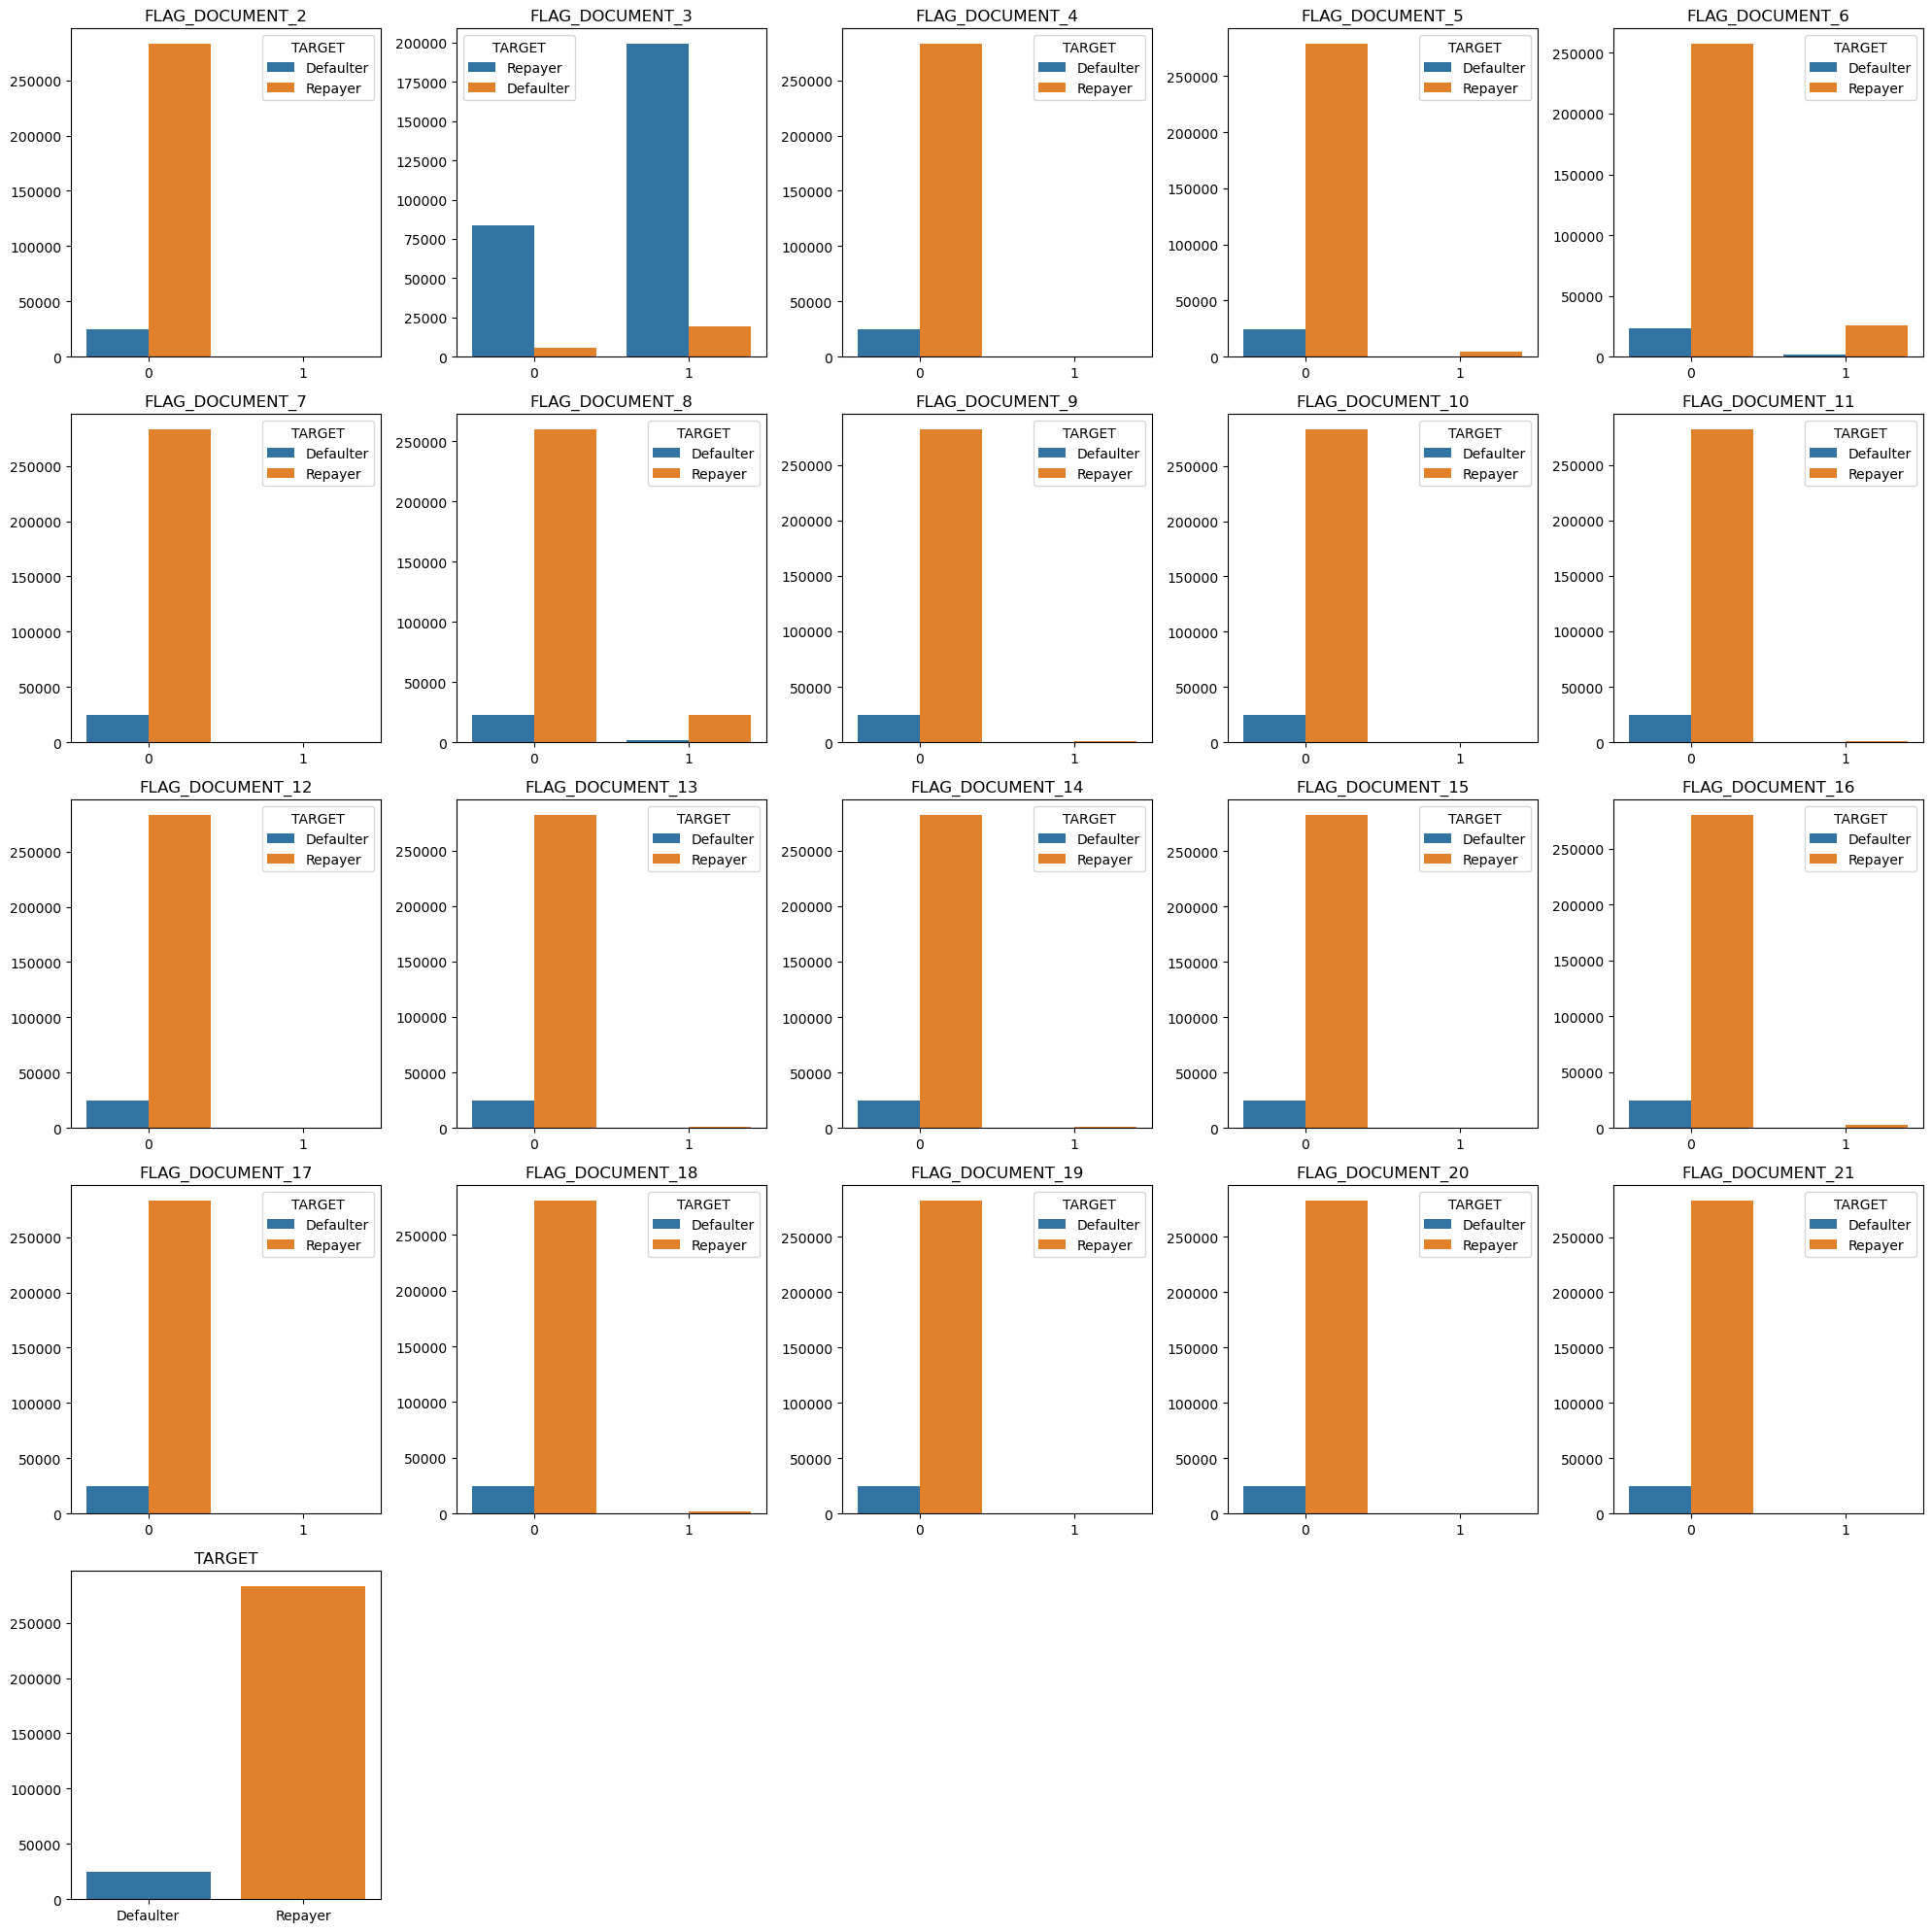

In [52]:
col_Doc = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
                       'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                       'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
                      'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',]
df_flag = df[col_Doc + ['TARGET']]
df_flag['TARGET'] = df_flag['TARGET'].replace({1:"Defaulter",0:"Repayer"}) # converting temperory defaulter and repayer for comparision of documents
plt.figure(figsize=(20, 20)) 
for index,col in enumerate(df_flag):
    plt.subplot(5,5,index+1)
    sns.countplot(x = col  , hue = 'TARGET',data = df_flag)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

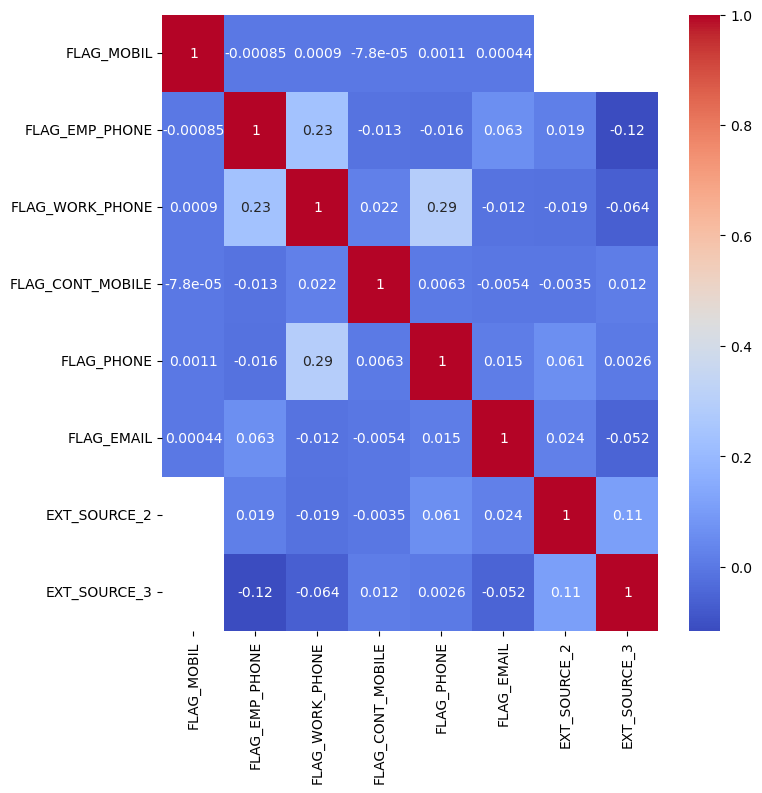

In [53]:
z = [ 'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL', 
            'EXT_SOURCE_2', 'EXT_SOURCE_3']
plt.figure(figsize = (8,8))
sns.heatmap(df[z].corr(),annot = True, cmap='coolwarm')
plt.show()

In [54]:
col_Doc.remove('FLAG_DOCUMENT_3')

* SK_ID_CURR
* REG_REGION_NOT_LIVE_REGION-
* REG_REGION_NOT_WORK_REGION- 
* LIVE_REGION_NOT_WORK_REGION- 
* REG_CITY_NOT_LIVE_CITY - 
* REG_CITY_NOT_WORK_CITY-
* DAYS_LAST_PHONE_CHANGE - 
* OBS_30_CNT_SOCIAL_CIRCLE -
* DEF_30_CNT_SOCIAL_CIRCLE -
* OBS_60_CNT_SOCIAL_CIRCLE-
* DEF_60_CNT_SOCIAL_CIRCLE-
* DAYS_LAST_PHONE_CHANGE-
* AMT_REQ_CREDIT_BUREAU_WEEK-
* AMT_REQ_CREDIT_BUREAU_MON-
* AMT_REQ_CREDIT_BUREAU_QRT-
* AMT_REQ_CREDIT_BUREAU_YEAR- 

In [55]:
y = ['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
     'REG_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE' ,'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
     'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
     'AMT_REQ_CREDIT_BUREAU_YEAR','HOUR_APPR_PROCESS_START','DAYS_REGISTRATION','DAYS_ID_PUBLISH','AMT_REQ_CREDIT_BUREAU_HOUR',
     'AMT_REQ_CREDIT_BUREAU_DAY','FLAG_OWN_CAR','FLAG_OWN_REALTY','WEEKDAY_APPR_PROCESS_START']

In [56]:
unimportent_columns = col_Doc + z + y
len(unimportent_columns)

51

In [57]:
df.drop(columns =unimportent_columns,inplace = True )

In [58]:
df.shape

(307511, 23)

##  Standardize Values

In [59]:
negative_value = ['DAYS_BIRTH','DAYS_EMPLOYED']

In [60]:
for i in negative_value: # to convert negartive value to possitve
    df[i] = df[i].abs()  

## Treat wrong data 

In [61]:
df.ORGANIZATION_TYPE = df.ORGANIZATION_TYPE.replace ({'XNA':np.nan})

In [62]:
df.NAME_FAMILY_STATUS = df.NAME_FAMILY_STATUS.replace({'Unknown':np.nan})

In [63]:
df.CODE_GENDER = df.CODE_GENDER.replace({'XNA':np.nan})

In [64]:
df.head(2)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3
0,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,Laborers,1.0,2,2,0,Business Entity Type 3,1
1,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,Core staff,2.0,1,1,0,School,1


## Treat wrong data type and missing values

In [65]:
df.isnull().sum()

TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        4
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 2
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE              55374
FLAG_DOCUMENT_3                    0
dtype: int64

In [66]:
df['CODE_GENDER'].fillna(df['CODE_GENDER'].mode()[0],inplace = True)

In [67]:
continious = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

In [68]:
df[continious].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


In [69]:
df['AMT_ANNUITY'].fillna(df.AMT_ANNUITY.median(),inplace = True)

In [70]:
df['AMT_GOODS_PRICE'].fillna(df.AMT_GOODS_PRICE.median(),inplace = True)

In [71]:
df['NAME_TYPE_SUITE'].fillna(df.NAME_TYPE_SUITE.mode()[0],inplace = True)

In [72]:
df['NAME_FAMILY_STATUS'].fillna(df.NAME_FAMILY_STATUS.mode()[0],inplace = True)

In [73]:
df = df.dropna(subset=['OCCUPATION_TYPE'])

In [74]:
df['ORGANIZATION_TYPE'].fillna(df.ORGANIZATION_TYPE.mode()[0],inplace = True)

In [75]:
df['CNT_FAM_MEMBERS'].fillna(df.CNT_FAM_MEMBERS.mode()[0],inplace = True)

## Treat duplicates

In [76]:
df.duplicated().sum()

7

In [77]:
df.drop_duplicates(inplace = True) # there is no duplicated record

## treat outlire 

In [78]:
df[continious].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,2.111130e+05,2.111130e+05,211113.000000,2.111130e+05
mean,1.757726e+05,6.103000e+05,27792.733555,5.480753e+05
std,2.751447e+05,4.057456e+05,14621.345388,3.721611e+05
min,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04
25%,1.125000e+05,2.779695e+05,17077.500000,2.475000e+05
50%,1.575000e+05,5.212800e+05,25834.500000,4.500000e+05
75%,2.115000e+05,8.248230e+05,35581.500000,6.885000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


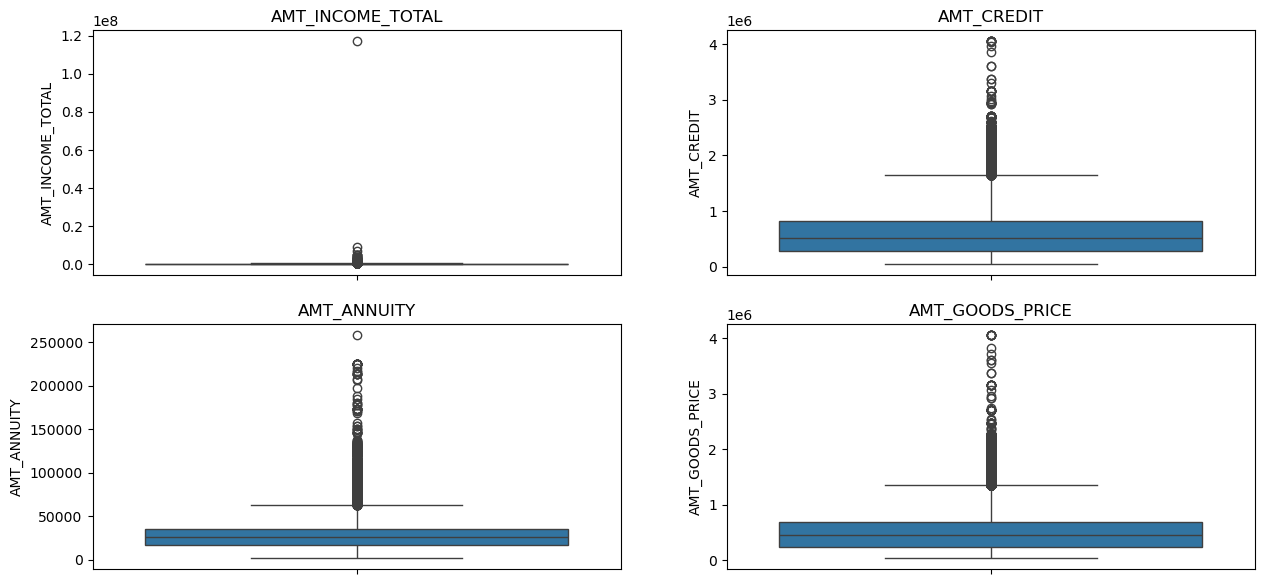

In [79]:
plt.figure(figsize = (15,7))
for n,i in enumerate(continious):
    plt.subplot(2,2,n+1)
    plt.title(i)
    sns.boxplot( df[i])
plt.show()

- almost all continious variable have outlire in this situation we have to keep the outlire because of some costomer have good income and also low income thats why outlilre are origional data and because of income ,all continious have outlires

# step 4 ->> Data Analysis 

## univarite analysis

In [80]:
df['TARGET']= df['TARGET'].replace({1:'defaulter',0:'repayer'})

In [81]:
pd.crosstab(df['NAME_CONTRACT_TYPE'], df['TARGET'],normalize='index')*100

TARGET,defaulter,repayer
NAME_CONTRACT_TYPE,,
Cash loans,9.129735,90.870265
Revolving loans,5.772778,94.227222


- most of the people whose take cash loan that one chance to do default 

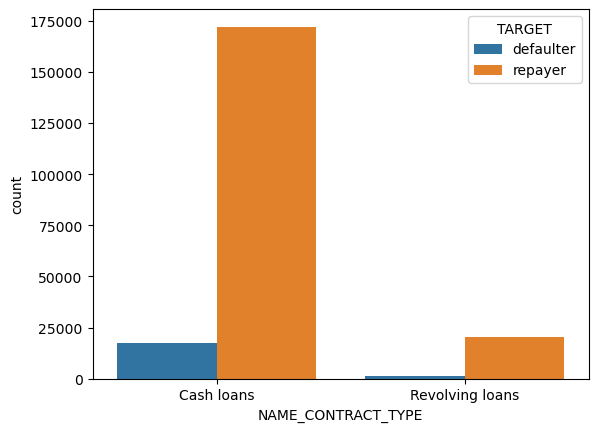

In [82]:
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = df, hue = 'TARGET')
plt.show()

In [83]:
pd.crosstab(df['CODE_GENDER'], df['TARGET'],normalize='index')*100

TARGET,defaulter,repayer
CODE_GENDER,,
F,7.712657,92.287343
M,10.478786,89.521214


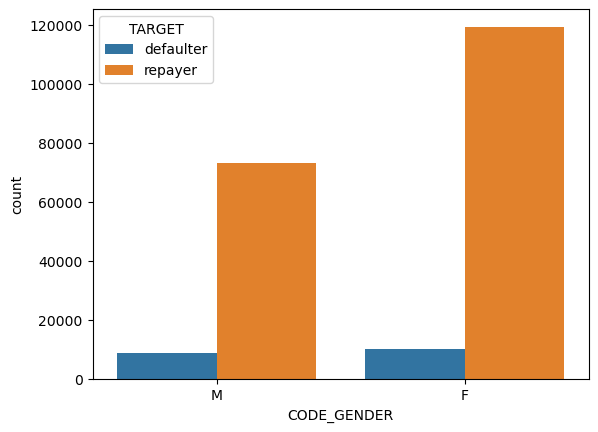

In [84]:
sns.countplot(x = 'CODE_GENDER', data = df, hue = 'TARGET')
plt.show()

- most of the cases male like to default the loan when compare to female 

In [85]:
def categorical(feature):
    sns.countplot(x = feature, data = df , hue = 'TARGET')
    plt.xticks(rotation = 45)
    plt.show()

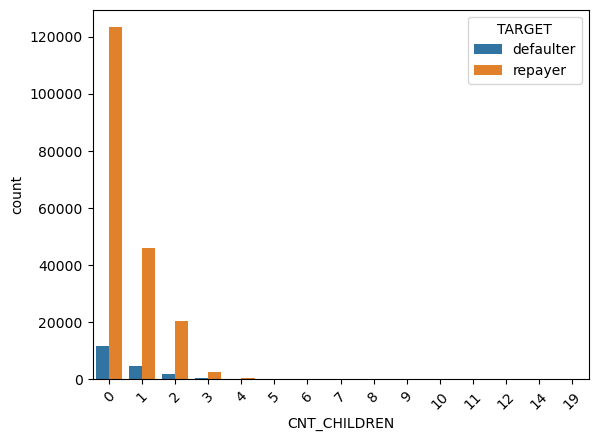

In [86]:
categorical('CNT_CHILDREN')

In [87]:
df['AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

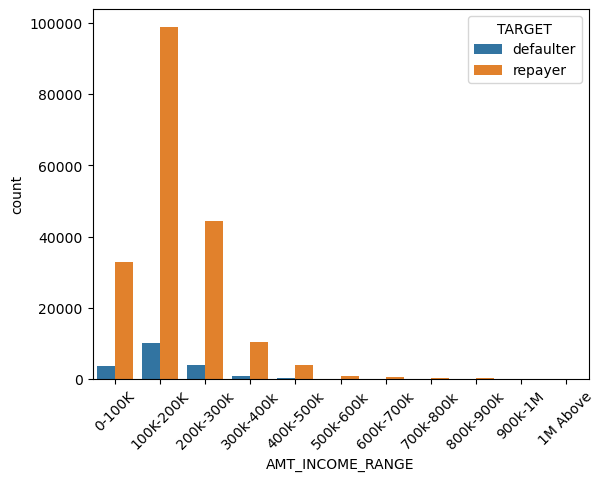

In [88]:
categorical('AMT_INCOME_RANGE')

In [89]:
pd.crosstab(df['AMT_INCOME_RANGE'],df['TARGET'],normalize = 'index')*100

TARGET,defaulter,repayer
AMT_INCOME_RANGE,,
0-100K,9.704826,90.295174
100K-200K,9.265170,90.734830
200k-300k,7.906466,92.093534
300k-400k,6.414621,93.585379
400k-500k,6.093366,93.906634
500k-600k,6.888361,93.111639
600k-700k,5.052006,94.947994
700k-800k,2.380952,97.619048
800k-900k,6.400000,93.600000


In [90]:
df['AMT_CREDIT']=df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

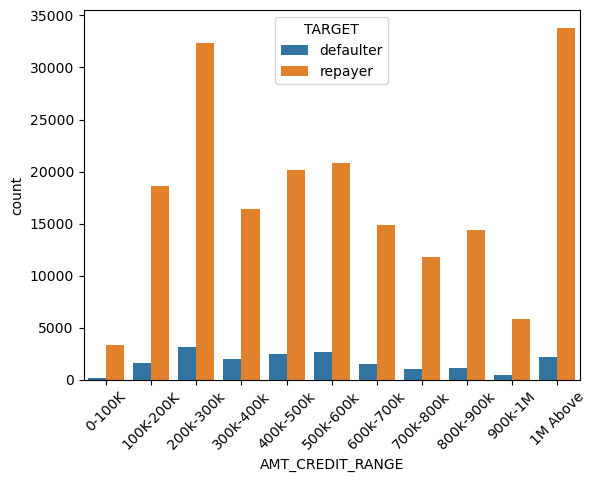

In [91]:
categorical('AMT_CREDIT_RANGE')

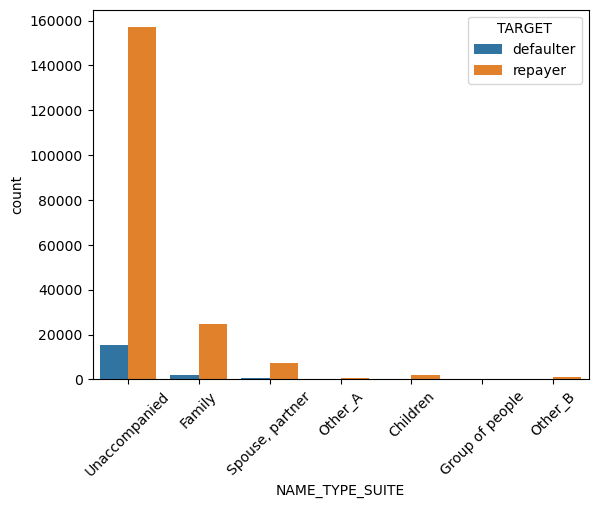

In [92]:
categorical('NAME_TYPE_SUITE')

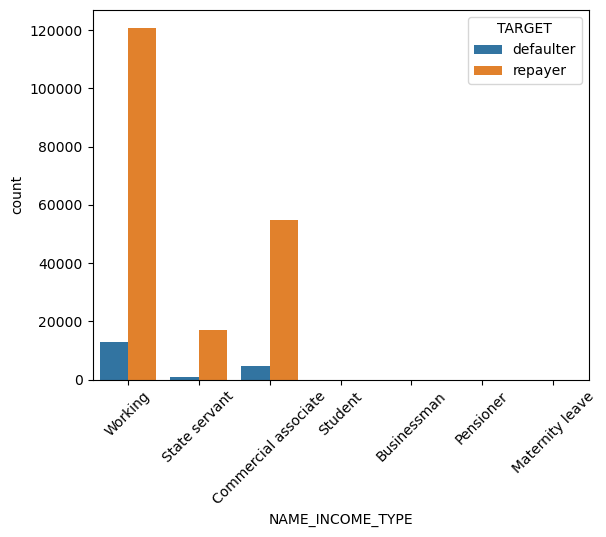

In [93]:
categorical('NAME_INCOME_TYPE')

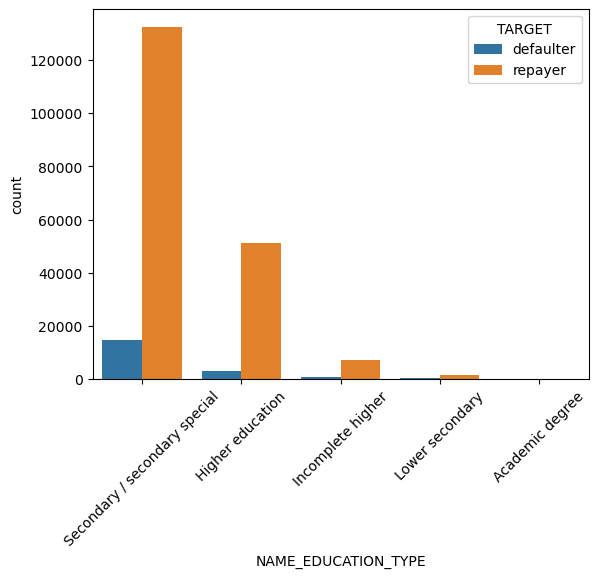

In [94]:
categorical('NAME_EDUCATION_TYPE')

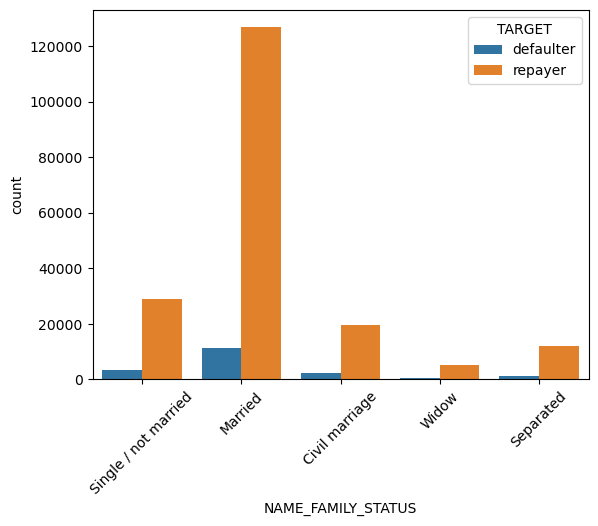

In [95]:
categorical('NAME_FAMILY_STATUS')

In [96]:
df['AGE'] = round(df.DAYS_BIRTH/365)

In [97]:
bins = [20, 30, 40, 50, 60, 70,]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', ]

# Apply pd.cut
df['age_group'] = pd.cut(df['AGE'], bins=bins, labels=labels)

In [98]:
df['age_group'].value_counts()

age_group
30-40    69147
40-50    61909
20-30    40478
50-60    35483
60-70     4096
Name: count, dtype: int64

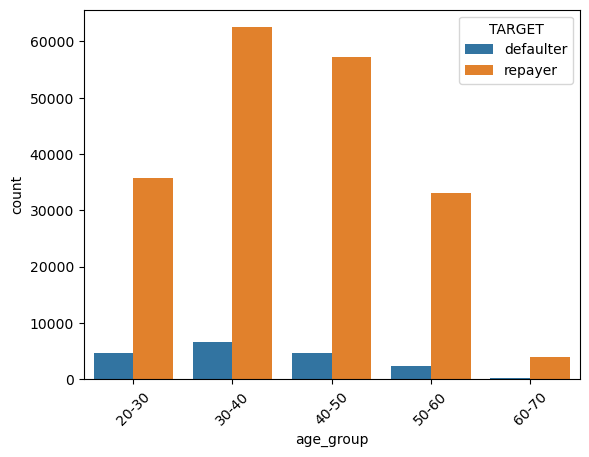

In [99]:
categorical('age_group')

# bivariate analysis

In [100]:
def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):  
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=df, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

<Figure size 1500x600 with 0 Axes>

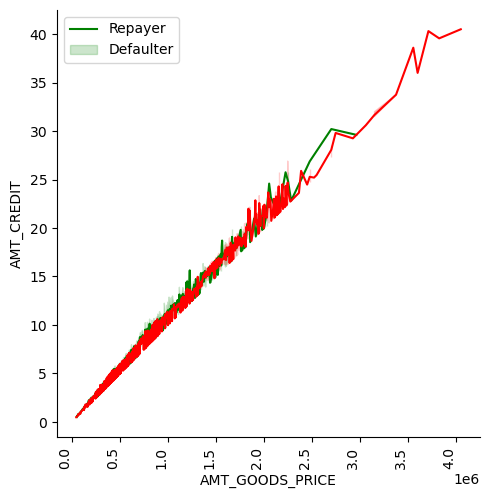

In [101]:
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',df,"TARGET", "line", ['g','r'], False,(15,6))

# Conclusion

1. NAME_EDUCATION_TYPE: Academic degree has less defaults.
2. NAME_INCOME_TYPE: Student and Businessmen have no defaults.
3. REGION_RATING_CLIENT: RATING 1 is safer.
4. ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%
5. DAYS_BIRTH: People above age of 50 have low probability of defaulting
6. DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate
7. AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default
8. NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.
9. CNT_CHILDREN: People with zero to two children tend to repay the loans.
10. NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
11. NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
12. NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
13. REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.
14. OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
15. ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
16. DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting
17. DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.
18. CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.
19. AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

## suggestion 

1. 90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.
2. 88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.